##Import thư viện

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Làm sạch dữ liệu

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Khai thác dữ liệu và ứng dụng - CS313.N21/Education_dataset_V2/05.ThiSinh.xlsx')

In [ ]:
df

,mssv,dien_tt,diem_tt,lop12_matinh,lop12_matruong,TEN_TRUONG
0,7E308531XPvAibaEXe879+AOg1gh8i58Q/VMq7RU,THPT,24.50,53.0,32.0,THPT Bình Đông
1,0FCB6532XPvAibaEXe879+AOg1gh8o0EEQcYQ8HR,THPT,27.50,16.0,41.0,THPT Lê Xoay
2,BAF446BFXPvAibaEXe879+AOg1gh8uQrEauqA0AG,THPT,25.00,42.0,21.0,THPT Di Linh
3,599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V,THPT,28.00,51.0,34.0,THPT Mỹ Hiệp
4,364B9E9BXPvAibaEXe879+AOg1gh8sRVdBmZSiXe,THPT,24.50,52.0,39.0,TTGDTX-HN Đất Đỏ (Trước 01/7/2019)
...,...,...,...,...,...,...
8229,418187C9XPvAibaEXe8Wb350a8ibnhbWI4z++VY2,THPT,21.10,56.0,14.0,THPT Phan Văn Trị
8230,738946F2XPvAibaEXe8Wb350a8ibnm5kQzFjIM2p,THPT,23.95,37.0,1.0,Quốc Học Quy Nhơn
8231,332E756EXPvAibaEXe8Wb350a8ibnvs4VyUWS40K,THPT,21.50,2.0,1.0,THPT Trưng Vương
8232,AB431338XPvAibaEXe8xMCTZ03/BexWzDCyWVsT3,THPT,24.70,47.0,25.0,THPT Quang Trung


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8234 entries, 0 to 8233
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mssv            8234 non-null   object 
 1   dien_tt         8234 non-null   object 
 2   diem_tt         8104 non-null   float64
 3   lop12_matinh    6060 non-null   float64
 4   lop12_matruong  6061 non-null   float64
 5   TEN_TRUONG      6060 non-null   object 
dtypes: float64(3), object(3)
memory usage: 386.1+ KB


In [ ]:
df.tail(20)

,mssv,dien_tt,diem_tt,lop12_matinh,lop12_matruong,TEN_TRUONG
8214,0B44DD5FXPvAibaEXe9MnecufC0W/lktvrO5PJs9,THPT,25.45,35.0,33.0,Trường THPT Số 1 Đức Phổ
8215,D5ED3383XPvAibaEXe8bVXYGG8kdZffFDL2zjoN5,THPT,25.40,38.0,5.0,Trường THPT Chuyên Hùng Vương
8216,F406C807XPvAibaEXe8bVXYGG8kdZcFZHur1VEtL,THPT,24.00,36.0,1.0,THPT Kon Tum
8217,9D8F880EXPvAibaEXe8bVXYGG8kdZbRgLyH0k8g7,THPT,20.05,30.0,19.0,THPT Nguyễn Văn Trỗi
8218,9088B9D3XPvAibaEXe8bVXYGG8kdZYyNlofUDXeW,THPT,22.55,47.0,5.0,THPT Hàm Thuận Nam
8219,74B0DCEDXPvAibaEXe8bVXYGG8kdZaurlwErgKdi,THPT,24.40,57.0,1.0,THPT Lưu Văn Liệt
8220,79E4B88BXPvAibaEXe8bVXYGG8kdZTwRmBKKESqJ,THPT,21.85,63.0,15.0,THPT Quang Trung
8221,CDA4E282XPvAibaEXe8bVXYGG8kdZVsrroRMNogn,THPT,24.60,46.0,30.0,THPT Nguyễn Chí Thanh (Trước 01/02/2020)
8222,40F613D8XPvAibaEXe8bVXYGG8kdZSrU8e0y+hru,THPT,22.95,52.0,5.0,THPT Nguyễn Huệ
8223,73072EC4XPvAibaEXe8Wb350a8ibnm4fZ7+lUp0T,THPT,21.90,38.0,5.0,Trường THPT Chuyên Hùng Vương


##Ép kiểu cột mã tỉnh thành số.

In [ ]:
df['lop12_matinh'] = pd.to_numeric(df['lop12_matinh'], errors='coerce')

##Thống kê các cột na

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8234 entries, 0 to 8233
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mssv            8234 non-null   object 
 1   dien_tt         8234 non-null   object 
 2   diem_tt         8104 non-null   float64
 3   lop12_matinh    6060 non-null   float64
 4   lop12_matruong  6061 non-null   float64
 5   TEN_TRUONG      6060 non-null   object 
dtypes: float64(3), object(3)
memory usage: 386.1+ KB


In [ ]:
#thống kê các dòng có cột điểm có na
missing = df['diem_tt'].isna()
rows_with_missing = df.loc[missing]


In [ ]:
rows_with_missing
# có thể thấy các dòng na của cột điểm có cột dien_tt là: TT-Bá», 30A, CUTUYEN, Æ¯T-ÄHQG.

,mssv,dien_tt,diem_tt,lop12_matinh,lop12_matruong,TEN_TRUONG
122,740BF475XPvAibaEXe80gGmWuNekT0DMGoGib8Ko,THPT,NaN,NaN,NaN,NaN
882,8D203797XPvAibaEXe99j2P15eeB0yiSFSPp6gj3,THPT,NaN,NaN,NaN,NaN
952,3EC4C95DXPvAibaEXe+Xxbs4kvH/k298KMqSjXz6,TT-Bộ,NaN,NaN,NaN,NaN
1050,C5F2150DXPvAibaEXe+tg0ae8qw/gtk+nFTaazYq,CUTUYEN,NaN,NaN,NaN,NaN
1257,22B7891BXPvAibaEXe9ajZoptpw4tY9OHdhwO7Pg,CUTUYEN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
6943,C6D60DF5XPvAibaEXe+g4B5cywZjwUOIySK7EBfD,CUTUYEN,NaN,NaN,NaN,NaN
6944,7CD02A9FXPvAibaEXe+g4B5cywZjwcj8TsG91YaQ,CUTUYEN,NaN,NaN,NaN,NaN
6945,6EC9B467XPvAibaEXe+g4B5cywZjwZVD7kCf00e1,CUTUYEN,NaN,NaN,NaN,NaN
6946,BB3DB683XPvAibaEXe+g4B5cywZjwSIIdpUdzbuP,CUTUYEN,NaN,NaN,NaN,NaN


##Chuẩn hóa cột dien_tt

In [ ]:
df_tinh = pd.read_excel('/content/Book1.xlsx')

In [ ]:
df_tinh

,tên tỉnh,Mã tỉnh,Tỉnh,Tên Tỉnh
0,Mã Tp. Hà Nội,1,Tp. Hà Nội,Tp. Hà Nội
1,Mã Tp. Hải Phòng,3,Tp. Hải Phòng,Tp. Hải Phòng
2,Mã tỉnh Hà Giang,5,tỉnh Hà Giang,Hà Giang
3,Mã tỉnh Cao Bằng,6,tỉnh Cao Bằng,Cao Bằng
4,Mã tỉnh Lai Châu,7,tỉnh Lai Châu,Lai Châu
...,...,...,...,...
59,Mã tỉnh Sóc Trăng,59,tỉnh Sóc Trăng,Sóc Trăng
60,Mã tỉnh Bạc Liêu,60,tỉnh Bạc Liêu,Bạc Liêu
61,Mã tỉnh Cà Mau,61,tỉnh Cà Mau,Cà Mau
62,Mã tỉnh Hậu Giang,64,tỉnh Hậu Giang,Hậu Giang


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8234 entries, 0 to 8233
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mssv            8234 non-null   object 
 1   dien_tt         8234 non-null   object 
 2   diem_tt         8104 non-null   float64
 3   lop12_matinh    6060 non-null   float64
 4   lop12_matruong  6061 non-null   float64
 5   TEN_TRUONG      6060 non-null   object 
dtypes: float64(3), object(3)
memory usage: 386.1+ KB


In [ ]:
df['lop12_matinh'].fillna(0,inplace = True)

In [ ]:
df['lop12_matinh'] = pd.to_numeric(df['lop12_matinh'], errors='coerce').astype('int')

In [ ]:
df.isna().sum()

mssv                 0
dien_tt              0
diem_tt            130
lop12_matinh         0
lop12_matruong    2173
TEN_TRUONG        2174
dtype: int64

In [ ]:
df_tinh = pd.DataFrame({'lop12_matinh': df_tinh['Mã tỉnh'],'Ten_Tinh': df_tinh['Tên Tỉnh']})

In [ ]:
merged_df = pd.merge(df, df_tinh, on='lop12_matinh')

In [ ]:
df_tinh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   lop12_matinh  64 non-null     int64 
 1   Ten_Tinh      63 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
merged_df

,mssv,dien_tt,diem_tt,lop12_matinh,lop12_matruong,TEN_TRUONG,Ten_Tinh
0,7E308531XPvAibaEXe879+AOg1gh8i58Q/VMq7RU,THPT,24.50,53,32.0,THPT Bình Đông,Tiền Giang
1,530FE4E9XPvAibaEXe+4hxKfaQWuhFsElpA2NjHn,THPT,26.50,53,22.0,THPT Vĩnh Bình,Tiền Giang
2,302C659FXPvAibaEXe80gGmWuNekT9HQE57P7S6C,THPT,31.50,53,25.0,THPT Trương Định,Tiền Giang
3,F99CE6DEXPvAibaEXe86736b6Ol+/O3ZQU1AW1/C,THPT,28.50,53,19.0,THPT Chợ Gạo,Tiền Giang
4,11D7FBB7XPvAibaEXe8/3iNqySORby7kyf2IzNeI,THPT,24.50,53,16.0,THPT Chuyên TG,Tiền Giang
...,...,...,...,...,...,...,...
8229,311E1AE6XPvAibaEXe9FHRfjQvHQkbcdh5YbwKoS,THPT,23.05,17,13.0,THPT Cẩm Phả,Quảng Ninh
8230,421F2ACAXPvAibaEXe9m0F2yptF5U1QKF3Mj3nX+,THPT,20.85,17,13.0,THPT Cẩm Phả,Quảng Ninh
8231,08F35A6DXPvAibaEXe9Vh8FJ4R+4oW19SLv2wQSP,THPT,23.70,18,36.0,THPT Yên Dũng số 2,Bắc Giang
8232,80CDDDF4XPvAibaEXe8zi/ZLIzSiuMk6tTI8ZBuE,THPT,19.45,18,74.0,THPT Hiệp Hòa số 4,Bắc Giang


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8234 entries, 0 to 8233
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mssv            8234 non-null   object 
 1   dien_tt         8234 non-null   object 
 2   diem_tt         8104 non-null   float64
 3   lop12_matinh    8234 non-null   int64  
 4   lop12_matruong  6061 non-null   float64
 5   TEN_TRUONG      6060 non-null   object 
 6   Ten_Tinh        6060 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 514.6+ KB


##Thêm tên trường và khu vực

In [ ]:
df_tinh = pd.read_csv('/content/tinh.csv')

In [ ]:
df_tinh

,Unnamed: 0,lop12_matinh,lop12_matruong,khuvuc
0,0,0,0,NaN
1,1,1,800,Khu vực 3
2,2,1,900,Khu vực 3
3,3,1,62,Khu vực 3
4,4,1,66,Khu vực 3
...,...,...,...,...
4879,4887,64,411,Khu vực 1
4880,4888,64,435,Khu vực 1
4881,4889,64,440,Khu vực 1
4882,4890,65,1,Khu vực 3


In [ ]:
df_tinh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4884 non-null   int64 
 1   lop12_matinh    4884 non-null   int64 
 2   lop12_matruong  4884 non-null   int64 
 3   khuvuc          4835 non-null   object
dtypes: int64(3), object(1)
memory usage: 152.8+ KB


In [ ]:
new_df = df.merge(df_tinh[['lop12_matinh', 'lop12_matruong', 'khuvuc']], on=['lop12_matinh', 'lop12_matruong'], how='left')

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8234 entries, 0 to 8233
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    8234 non-null   int64  
 1   Unnamed: 0      8234 non-null   int64  
 2   mssv            8234 non-null   object 
 3   dien_tt         8234 non-null   int64  
 4   diem_tt         8104 non-null   float64
 5   lop12_matinh    8234 non-null   int64  
 6   lop12_matruong  6061 non-null   float64
 7   TEN_TRUONG      6060 non-null   object 
 8   Ten_Tinh        6060 non-null   object 
 9   KHU_VUC         3664 non-null   object 
 10  nam_thi         8234 non-null   float64
 11  scale_dien_tt   8104 non-null   float64
 12  khuvuc          5247 non-null   object 
dtypes: float64(4), int64(4), object(5)
memory usage: 900.6+ KB


In [ ]:
new_df

In [ ]:
new_df['mssv'].duplicated().sum()

0

In [ ]:
new_df['khuvuc'].isna().sum()

2987

##thêm năm

In [ ]:
sv = pd.read_excel('/content/drive/MyDrive/Khai thác dữ liệu và ứng dụng - CS313.N21/Education_dataset_V2/01.sinhvien.xlsx')

In [ ]:
sv

,id,mssv,namsinh,gioitinh,noisinh,lopsh,khoa,hedt,khoahoc,chuyennganh2,...,_47,_48,_49,_50,_51,_52,_53,_54,_55,_56
0,1.0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1995.0,1.0,TP. Hồ Chí Minh,KTPM0001,CNPM,CQUI,8.0,D480103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM,1995.0,1.0,Đồng Tháp,HTTT0001,HTTT,CTTT,8.0,D480104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt,1994.0,1.0,Hà Nam Ninh,KHMT2013,KHMT,CQUI,8.0,D480101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu,1995.0,1.0,TP. Hồ Chí Minh,HTTT0001,HTTT,CTTT,8.0,D480104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6,1995.0,1.0,Thành phố Hồ Chí Minh,MMTT0001,MMT&TT,CQUI,8.0,D480201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8311,19283.0,7D7633B0XPvAibaEXe95IhrkYSGfcCQVGm4nFGyt,2000.0,1.0,'An Giang',MMCL2019.2,MMT&TT,CLC,14.0,7480102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8312,19284.0,AB431338XPvAibaEXe8xMCTZ03/BexWzDCyWVsT3,2001.0,1.0,'Bình Thuận',KHMT2019,KHMT,CQUI,14.0,D480101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8313,19285.0,75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM,2001.0,1.0,'Lâm Đồng',KHMT2019,KHMT,CQUI,14.0,D480101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8314,19345.0,CB263C18XPvAibaEXe8xMCTZ03/Be8yk40QWdPiR,2000.0,1.0,'Bến Tre',CNTT2019,KTTT,CQUI,14.0,D480201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8316 entries, 0 to 8315
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8295 non-null   float64
 1   mssv            8295 non-null   object 
 2    namsinh        8294 non-null   float64
 3    gioitinh       8295 non-null   float64
 4    noisinh        8295 non-null   object 
 5    lopsh          8295 non-null   object 
 6    khoa           8295 non-null   object 
 7    hedt           8295 non-null   object 
 8    khoahoc        8295 non-null   float64
 9    chuyennganh2   8295 non-null   object 
 10   tinhtrang      8295 non-null   float64
 11   diachi_tinhtp  8295 non-null   object 
 12  Column1         1549 non-null   object 
 13  _1              1040 non-null   object 
 14  _2              669 non-null    object 
 15  _3              406 non-null    object 
 16  _4              233 non-null    object 
 17  _5              138 non-null    o

In [ ]:
masv_thamso = pd.DataFrame({'mssv': sv['mssv'],'khoa_hoc':sv[sv.columns[8]]})

In [ ]:
masv_thamso

,mssv,khoa_hoc
0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,8.0
1,2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM,8.0
2,83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt,8.0
3,91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu,8.0
4,007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6,8.0
...,...,...
8311,7D7633B0XPvAibaEXe95IhrkYSGfcCQVGm4nFGyt,14.0
8312,AB431338XPvAibaEXe8xMCTZ03/BexWzDCyWVsT3,14.0
8313,75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM,14.0
8314,CB263C18XPvAibaEXe8xMCTZ03/Be8yk40QWdPiR,14.0


In [ ]:
sv['mssv'].duplicated().sum()

20

In [ ]:
masv_thamso.iloc[:,1]

0        8.0
1        8.0
2        8.0
3        8.0
4        8.0
        ... 
8311    14.0
8312    14.0
8313    14.0
8314    14.0
8315    14.0
Name: khoa_hoc, Length: 8316, dtype: float64

In [ ]:
def u(stst):
  for id,s in enumerate(stst):
    stst[id] = 2005+s
  return stst

In [ ]:
a = u(masv_thamso.iloc[:,1])

<ipython-input-75-e0c4672faa35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stst[id] = 2005+s


In [ ]:
len(a)

8316

In [ ]:
a

0       2013.0
1       2013.0
2       2013.0
3       2013.0
4       2013.0
         ...  
8311    2019.0
8312    2019.0
8313    2019.0
8314    2019.0
8315    2019.0
Name: khoa_hoc, Length: 8316, dtype: float64

In [ ]:
nam = pd.DataFrame({'mssv':masv_thamso.iloc[:,0],'nam_thi': a})

In [ ]:
nam

,mssv,nam_thi
0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,2013.0
1,2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM,2013.0
2,83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt,2013.0
3,91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu,2013.0
4,007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6,2013.0
...,...,...
8311,7D7633B0XPvAibaEXe95IhrkYSGfcCQVGm4nFGyt,2019.0
8312,AB431338XPvAibaEXe8xMCTZ03/BexWzDCyWVsT3,2019.0
8313,75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM,2019.0
8314,CB263C18XPvAibaEXe8xMCTZ03/Be8yk40QWdPiR,2019.0


In [ ]:
nam['mssv'].duplicated().sum()

20

In [ ]:
df_clean=new_df.merge(nam, on='mssv',how='left')

In [ ]:
df_clean.info()
#cột năm thi của bảng thí sinh sau khi merge từ cột sinh viên có 8234 nhưng chỉ có 720 dòng có dữ liệu.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8234 entries, 0 to 8233
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mssv            8234 non-null   object 
 1   dien_tt         8234 non-null   object 
 2   diem_tt         8104 non-null   float64
 3   lop12_matinh    8234 non-null   object 
 4   lop12_matruong  6061 non-null   object 
 5   TEN_TRUONG      6060 non-null   object 
 6   Ten_Tinh        6060 non-null   object 
 7   KHU_VUC         3664 non-null   object 
 8   nam_thi         8234 non-null   float64
dtypes: float64(2), object(7)
memory usage: 643.3+ KB


In [ ]:
df_clean['nam_thi'].unique()
#chỉ có giá năm 2013 còn lại nan

array([2013., 2016., 2017., 2018., 2019., 2014., 2015.])

In [ ]:
df_clean['nam_thi'].isna().sum()
#Bị rỗng tới 7514 dòng.

0

In [ ]:
df_clean.to_csv('/content/drive/MyDrive/Khai thác dữ liệu và ứng dụng - CS313.N21/edu_data_v2/05.thisinh.csv')

In [ ]:
count = 0
for s1 in new_df['mssv']:
    for s2 in sv.iloc[:,2]:
        if s1 == s2:
            count += 1

# In kết quả
print("Số chuỗi giống nhau là:", count)

Số chuỗi giống nhau là: 0


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8234 entries, 0 to 8233
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mssv            8234 non-null   object 
 1   dien_tt         8234 non-null   object 
 2   diem_tt         8104 non-null   float64
 3   lop12_matinh    8234 non-null   object 
 4   lop12_matruong  6061 non-null   object 
 5   TEN_TRUONG      6060 non-null   object 
 6   Ten_Tinh        6060 non-null   object 
 7   KHU_VUC         3664 non-null   object 
 8   nam_thi         8234 non-null   float64
dtypes: float64(2), object(7)
memory usage: 643.3+ KB


In [ ]:
df_clean.columns = df_clean.columns.str.strip()

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8234 entries, 0 to 8233
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mssv            8234 non-null   object 
 1   dien_tt         8234 non-null   object 
 2   diem_tt         8104 non-null   float64
 3   lop12_matinh    8234 non-null   object 
 4   lop12_matruong  6061 non-null   object 
 5   TEN_TRUONG      6060 non-null   object 
 6   Ten_Tinh        6060 non-null   object 
 7   KHU_VUC         3664 non-null   object 
 8   nam_thi         8234 non-null   float64
dtypes: float64(2), object(7)
memory usage: 643.3+ KB


In [ ]:
df_clean['dien_tt']

0       THPT
1       THPT
2       THPT
3       THPT
4       THPT
        ... 
8229    THPT
8230    THPT
8231    THPT
8232    THPT
8233    THPT
Name: dien_tt, Length: 8234, dtype: object

#Phân Tích dữ liệu

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Khai thác dữ liệu và ứng dụng - CS313.N21/edu_data_v2/05.thisinh.csv')

In [ ]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,mssv,dien_tt,diem_tt,lop12_matinh,lop12_matruong,TEN_TRUONG,Ten_Tinh,KHU_VUC,nam_thi
0,0,0,0,7E308531XPvAibaEXe879+AOg1gh8i58Q/VMq7RU,0,24.50,53,32.0,THPT Bình Đông,Tiền Giang,Khu vực 1,2013.0
1,1,1,1,530FE4E9XPvAibaEXe+4hxKfaQWuhFsElpA2NjHn,0,26.50,53,22.0,THPT Vĩnh Bình,Tiền Giang,Khu vực 2 NT,2013.0
2,2,2,2,302C659FXPvAibaEXe80gGmWuNekT9HQE57P7S6C,0,31.50,53,25.0,THPT Trương Định,Tiền Giang,Khu vực 2,2013.0
3,3,3,3,F99CE6DEXPvAibaEXe86736b6Ol+/O3ZQU1AW1/C,0,28.50,53,19.0,THPT Chợ Gạo,Tiền Giang,Khu vực 2 NT,2013.0
4,4,4,4,11D7FBB7XPvAibaEXe8/3iNqySORby7kyf2IzNeI,0,24.50,53,16.0,THPT Chuyên TG,Tiền Giang,Khu vực 2,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8229,8229,8229,8229,311E1AE6XPvAibaEXe9FHRfjQvHQkbcdh5YbwKoS,0,23.05,17,13.0,THPT Cẩm Phả,Quảng Ninh,NaN,2019.0
8230,8230,8230,8230,421F2ACAXPvAibaEXe9m0F2yptF5U1QKF3Mj3nX+,0,20.85,17,13.0,THPT Cẩm Phả,Quảng Ninh,NaN,2019.0
8231,8231,8231,8231,08F35A6DXPvAibaEXe9Vh8FJ4R+4oW19SLv2wQSP,0,23.70,18,36.0,THPT Yên Dũng số 2,Bắc Giang,NaN,2019.0
8232,8232,8232,8232,80CDDDF4XPvAibaEXe8zi/ZLIzSiuMk6tTI8ZBuE,0,19.45,18,74.0,THPT Hiệp Hòa số 4,Bắc Giang,NaN,2019.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8234 entries, 0 to 8233
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.3    8234 non-null   int64  
 1   Unnamed: 0.2    8234 non-null   int64  
 2   Unnamed: 0.1    8234 non-null   int64  
 3   Unnamed: 0      8234 non-null   int64  
 4   mssv            8234 non-null   object 
 5   dien_tt         8234 non-null   int64  
 6   diem_tt         8104 non-null   float64
 7   lop12_matinh    8234 non-null   int64  
 8   lop12_matruong  6061 non-null   float64
 9   TEN_TRUONG      6060 non-null   object 
 10  Ten_Tinh        6060 non-null   object 
 11  KHU_VUC         5247 non-null   object 
 12  nam_thi         8234 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 836.4+ KB


In [ ]:
df

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,mssv,dien_tt,diem_tt,lop12_matinh,lop12_matruong,TEN_TRUONG,Ten_Tinh,KHU_VUC,nam_thi
0,0,0,0,0,7E308531XPvAibaEXe879+AOg1gh8i58Q/VMq7RU,0,24.50,53,32.0,THPT Bình Đông,Tiền Giang,Khu vực 1,2013.0
1,1,1,1,1,530FE4E9XPvAibaEXe+4hxKfaQWuhFsElpA2NjHn,0,26.50,53,22.0,THPT Vĩnh Bình,Tiền Giang,Khu vực 2 NT,2013.0
2,2,2,2,2,302C659FXPvAibaEXe80gGmWuNekT9HQE57P7S6C,0,31.50,53,25.0,THPT Trương Định,Tiền Giang,Khu vực 2,2013.0
3,3,3,3,3,F99CE6DEXPvAibaEXe86736b6Ol+/O3ZQU1AW1/C,0,28.50,53,19.0,THPT Chợ Gạo,Tiền Giang,Khu vực 2 NT,2013.0
4,4,4,4,4,11D7FBB7XPvAibaEXe8/3iNqySORby7kyf2IzNeI,0,24.50,53,16.0,THPT Chuyên TG,Tiền Giang,Khu vực 2,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8229,8229,8229,8229,8229,311E1AE6XPvAibaEXe9FHRfjQvHQkbcdh5YbwKoS,0,23.05,17,13.0,THPT Cẩm Phả,Quảng Ninh,Khu vực 2,2019.0
8230,8230,8230,8230,8230,421F2ACAXPvAibaEXe9m0F2yptF5U1QKF3Mj3nX+,0,20.85,17,13.0,THPT Cẩm Phả,Quảng Ninh,Khu vực 2,2019.0
8231,8231,8231,8231,8231,08F35A6DXPvAibaEXe9Vh8FJ4R+4oW19SLv2wQSP,0,23.70,18,36.0,THPT Yên Dũng số 2,Bắc Giang,Khu vực 1,2019.0
8232,8232,8232,8232,8232,80CDDDF4XPvAibaEXe8zi/ZLIzSiuMk6tTI8ZBuE,0,19.45,18,74.0,THPT Hiệp Hòa số 4,Bắc Giang,Khu vực 1,2019.0


In [ ]:
df['dien_tt'].unique()

array([0, 6, 5, 3, 1, 2, 4, 7])

In [ ]:
xet_tuyen = {'THPT':0, 'TT-Bộ':1, 'CUTUYEN':2, 'ƯT-Bộ':3, '30A':4, 'ƯT-ĐHQG':5, 'ĐGNL':6,
       'CCQT':7 }
df['dien_tt'] = df['dien_tt'].replace(xet_tuyen)

In [ ]:
df['KHU_VUC']= new_df['khuvuc']

In [ ]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,mssv,dien_tt,diem_tt,lop12_matinh,lop12_matruong,TEN_TRUONG,Ten_Tinh,KHU_VUC,nam_thi
0,0,0,0,7E308531XPvAibaEXe879+AOg1gh8i58Q/VMq7RU,0,24.50,53,32.0,THPT Bình Đông,Tiền Giang,Khu vực 1,2013.0
1,1,1,1,530FE4E9XPvAibaEXe+4hxKfaQWuhFsElpA2NjHn,0,26.50,53,22.0,THPT Vĩnh Bình,Tiền Giang,Khu vực 2 NT,2013.0
2,2,2,2,302C659FXPvAibaEXe80gGmWuNekT9HQE57P7S6C,0,31.50,53,25.0,THPT Trương Định,Tiền Giang,Khu vực 2,2013.0
3,3,3,3,F99CE6DEXPvAibaEXe86736b6Ol+/O3ZQU1AW1/C,0,28.50,53,19.0,THPT Chợ Gạo,Tiền Giang,Khu vực 2 NT,2013.0
4,4,4,4,11D7FBB7XPvAibaEXe8/3iNqySORby7kyf2IzNeI,0,24.50,53,16.0,THPT Chuyên TG,Tiền Giang,Khu vực 2,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8229,8229,8229,8229,311E1AE6XPvAibaEXe9FHRfjQvHQkbcdh5YbwKoS,0,23.05,17,13.0,THPT Cẩm Phả,Quảng Ninh,Khu vực 2,2019.0
8230,8230,8230,8230,421F2ACAXPvAibaEXe9m0F2yptF5U1QKF3Mj3nX+,0,20.85,17,13.0,THPT Cẩm Phả,Quảng Ninh,Khu vực 2,2019.0
8231,8231,8231,8231,08F35A6DXPvAibaEXe9Vh8FJ4R+4oW19SLv2wQSP,0,23.70,18,36.0,THPT Yên Dũng số 2,Bắc Giang,Khu vực 1,2019.0
8232,8232,8232,8232,80CDDDF4XPvAibaEXe8zi/ZLIzSiuMk6tTI8ZBuE,0,19.45,18,74.0,THPT Hiệp Hòa số 4,Bắc Giang,Khu vực 1,2019.0


In [ ]:
df['KHU_VUC'].isna().sum()

2987

In [ ]:
df.to_csv('/content/drive/MyDrive/Khai thác dữ liệu và ứng dụng - CS313.N21/edu_data_v2/05.thisinh.csv')

In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,mssv,dien_tt,diem_tt,lop12_matinh,lop12_matruong,TEN_TRUONG,Ten_Tinh,KHU_VUC,nam_thi
0,0,0,7E308531XPvAibaEXe879+AOg1gh8i58Q/VMq7RU,0,24.50,53,32.0,THPT Bình Đông,Tiền Giang,Khu vực 1,2013.0
1,1,1,530FE4E9XPvAibaEXe+4hxKfaQWuhFsElpA2NjHn,0,26.50,53,22.0,THPT Vĩnh Bình,Tiền Giang,Khu vực 2 NT,2013.0
2,2,2,302C659FXPvAibaEXe80gGmWuNekT9HQE57P7S6C,0,31.50,53,25.0,THPT Trương Định,Tiền Giang,Khu vực 2,2013.0
3,3,3,F99CE6DEXPvAibaEXe86736b6Ol+/O3ZQU1AW1/C,0,28.50,53,19.0,THPT Chợ Gạo,Tiền Giang,Khu vực 2 NT,2013.0
4,4,4,11D7FBB7XPvAibaEXe8/3iNqySORby7kyf2IzNeI,0,24.50,53,16.0,THPT Chuyên TG,Tiền Giang,Khu vực 2,2013.0
...,...,...,...,...,...,...,...,...,...,...,...
8229,8229,8229,311E1AE6XPvAibaEXe9FHRfjQvHQkbcdh5YbwKoS,0,23.05,17,13.0,THPT Cẩm Phả,Quảng Ninh,NaN,2019.0
8230,8230,8230,421F2ACAXPvAibaEXe9m0F2yptF5U1QKF3Mj3nX+,0,20.85,17,13.0,THPT Cẩm Phả,Quảng Ninh,NaN,2019.0
8231,8231,8231,08F35A6DXPvAibaEXe9Vh8FJ4R+4oW19SLv2wQSP,0,23.70,18,36.0,THPT Yên Dũng số 2,Bắc Giang,NaN,2019.0
8232,8232,8232,80CDDDF4XPvAibaEXe8zi/ZLIzSiuMk6tTI8ZBuE,0,19.45,18,74.0,THPT Hiệp Hòa số 4,Bắc Giang,NaN,2019.0


In [ ]:
dien_counts = df['dien_tt'].value_counts()

In [ ]:
dien_counts

0    7449
6     380
5     300
1      56
2      25
3      21
4       2
7       1
Name: dien_tt, dtype: int64

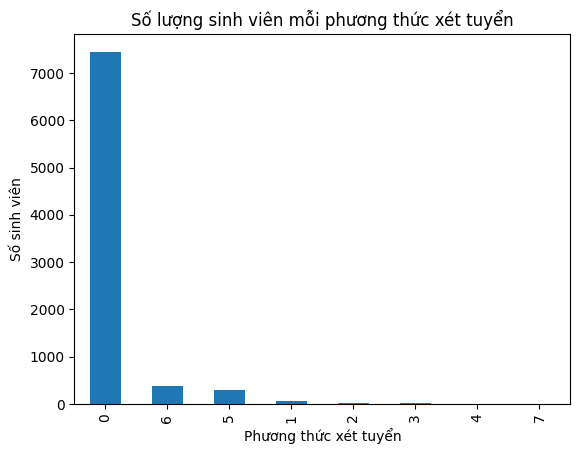

In [ ]:
dien_counts.plot(kind='bar')
plt.title('Số lượng sinh viên mỗi phương thức xét tuyển')
plt.xlabel('Phương thức xét tuyển')
plt.ylabel('Số sinh viên')
plt.show()

In [ ]:
diem_dien_1 = df.groupby('dien_tt')['diem_tt'].describe()

In [ ]:
diem_dien = df.groupby('dien_tt')['diem_tt']

In [ ]:
diem_dien_1

,count,mean,std,min,25%,50%,75%,max
dien_tt,,,,,,,,
0,7447.0,23.889727,2.650081,17.00,22.0000,23.50,25.5000,35.50
1,10.0,0.000000,0.000000,0.00,0.0000,0.00,0.0000,0.00
2,8.0,0.000000,0.000000,0.00,0.0000,0.00,0.0000,0.00
3,6.0,21.750000,1.557241,20.25,20.6875,21.25,22.5625,24.25
4,1.0,0.000000,NaN,0.00,0.0000,0.00,0.0000,0.00
5,252.0,25.800913,1.115352,21.83,25.1225,25.80,26.4000,28.73
6,380.0,859.739474,76.832258,690.00,805.0000,868.00,913.0000,1059.00
7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def scale_dien_6(x):
    if x['dien_tt'] == 6:
        x['scale_dien_tt'] = x['diem_tt']/40
    else:
        x['scale_dien_tt'] = x['diem_tt']
    return x

df = df.apply(scale_dien_6, axis=1)

In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,mssv,dien_tt,diem_tt,lop12_matinh,lop12_matruong,TEN_TRUONG,Ten_Tinh,KHU_VUC,nam_thi,scale_dien_tt
0,0,0,7E308531XPvAibaEXe879+AOg1gh8i58Q/VMq7RU,0,24.50,53,32.0,THPT Bình Đông,Tiền Giang,Khu vực 1,2013.0,24.50
1,1,1,530FE4E9XPvAibaEXe+4hxKfaQWuhFsElpA2NjHn,0,26.50,53,22.0,THPT Vĩnh Bình,Tiền Giang,Khu vực 2 NT,2013.0,26.50
2,2,2,302C659FXPvAibaEXe80gGmWuNekT9HQE57P7S6C,0,31.50,53,25.0,THPT Trương Định,Tiền Giang,Khu vực 2,2013.0,31.50
3,3,3,F99CE6DEXPvAibaEXe86736b6Ol+/O3ZQU1AW1/C,0,28.50,53,19.0,THPT Chợ Gạo,Tiền Giang,Khu vực 2 NT,2013.0,28.50
4,4,4,11D7FBB7XPvAibaEXe8/3iNqySORby7kyf2IzNeI,0,24.50,53,16.0,THPT Chuyên TG,Tiền Giang,Khu vực 2,2013.0,24.50
...,...,...,...,...,...,...,...,...,...,...,...,...
8229,8229,8229,311E1AE6XPvAibaEXe9FHRfjQvHQkbcdh5YbwKoS,0,23.05,17,13.0,THPT Cẩm Phả,Quảng Ninh,NaN,2019.0,23.05
8230,8230,8230,421F2ACAXPvAibaEXe9m0F2yptF5U1QKF3Mj3nX+,0,20.85,17,13.0,THPT Cẩm Phả,Quảng Ninh,NaN,2019.0,20.85
8231,8231,8231,08F35A6DXPvAibaEXe9Vh8FJ4R+4oW19SLv2wQSP,0,23.70,18,36.0,THPT Yên Dũng số 2,Bắc Giang,NaN,2019.0,23.70
8232,8232,8232,80CDDDF4XPvAibaEXe8zi/ZLIzSiuMk6tTI8ZBuE,0,19.45,18,74.0,THPT Hiệp Hòa số 4,Bắc Giang,NaN,2019.0,19.45


In [ ]:
import numpy as np

In [ ]:
count =  0
for i in df['TEN_TRUONG']:
  if pd.isna(i):
    continue
  elif 'chuyên' in i or 'Chuyên' in i:
    count= count +1
print(count)
#Chuyên 771, THCS 276, GDTX 53, THPT 5233

771


In [ ]:
df.groupby('dien_tt')['scale_dien_tt'].describe()

,count,mean,std,min,25%,50%,75%,max
dien_tt,,,,,,,,
0,7447.0,23.889727,2.650081,17.00,22.0000,23.50,25.5000,35.500
1,10.0,0.000000,0.000000,0.00,0.0000,0.00,0.0000,0.000
2,8.0,0.000000,0.000000,0.00,0.0000,0.00,0.0000,0.000
3,6.0,21.750000,1.557241,20.25,20.6875,21.25,22.5625,24.250
4,1.0,0.000000,NaN,0.00,0.0000,0.00,0.0000,0.000
5,252.0,25.800913,1.115352,21.83,25.1225,25.80,26.4000,28.730
6,380.0,21.493487,1.920806,17.25,20.1250,21.70,22.8250,26.475
7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='dien_tt', ylabel='scale_dien_tt'>

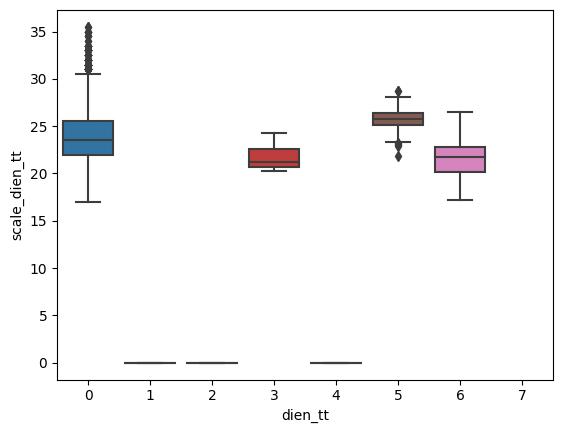

In [ ]:
sns.boxplot(df,x = 'dien_tt', y='scale_dien_tt')

In [ ]:
df['nam_thi'].unique()

array([2013., 2016., 2017., 2018., 2019., 2014., 2015.])

In [ ]:
df['nam_thi'].value_counts()

2019.0    1713
2018.0    1411
2017.0    1089
2016.0    1039
2015.0    1030
2014.0    1009
2013.0     943
Name: nam_thi, dtype: int64

In [ ]:
group_nam_dien = df.groupby(['dien_tt', 'nam_thi'])['diem_tt'].describe()

In [ ]:
group_nam_dien

count        mean        std     min       25%     50%  \
dien_tt nam_thi                                                            
0       2013.0    941.0   26.431456   2.346530   22.00   24.5000   26.00   
        2014.0   1003.0   27.276670   2.036830   19.50   26.0000   27.00   
        2015.0   1021.0   22.980901   1.164688   20.00   22.2500   23.00   
        2016.0   1002.0   22.260479   1.213947   19.00   21.5000   22.25   
        2017.0   1032.0   24.380814   1.934071   18.00   23.0000   24.75   
        2018.0   1162.0   21.314269   1.616388   17.00   20.1500   21.45   
        2019.0   1286.0   23.312302   1.705547   17.80   22.1000   23.55   
1       2014.0      0.0         NaN        NaN     NaN       NaN     NaN   
        2015.0      9.0    0.000000   0.000000    0.00    0.0000    0.00   
        2016.0      0.0         NaN        NaN     NaN       NaN     NaN   
        2017.0      0.0         NaN        NaN     NaN       NaN     NaN   
        2018.0      1.0    0.000000        NaN    0.00    0.0000    0.00   
        2019.0      0.0         NaN        NaN     NaN       NaN     NaN   
2       2014.0      0.0         NaN        NaN     NaN       NaN     NaN   
        2016.0      0.0         NaN        NaN     NaN       NaN     NaN   
        2017.0      0.0         NaN        NaN     NaN       NaN     NaN   
        2018.0      8.0    0.000000   0.000000    0.00    0.0000    0.00   
        2019.0      0.0         NaN        NaN     NaN       NaN     NaN   
3       2016.0      6.0   21.750000   1.557241   20.25   20.6875   21.25   
        2018.0      0.0         NaN        NaN     NaN       NaN     NaN   
        2019.0      0.0         NaN        NaN     NaN       NaN     NaN   
4       2016.0      0.0         NaN        NaN     NaN       NaN     NaN   
        2018.0      1.0    0.000000        NaN    0.00    0.0000    0.00   
5       2017.0      0.0         NaN        NaN     NaN       NaN     NaN   
        2018.0    123.0   25.677480   1.326001   21.83   24.8300   25.70   
        2019.0    129.0   25.918605   0.857300   23.50   25.4000   25.90   
6       2018.0    105.0  796.419048  77.620103  690.00  731.0000  785.00   
        2019.0    275.0  883.916364  61.281482  752.00  844.5000  886.00   
7       2019.0      0.0         NaN        NaN     NaN       NaN     NaN   

                      75%      max  
dien_tt nam_thi                     
0       2013.0    28.0000    35.50  
        2014.0    28.5000    35.50  
        2015.0    23.7500    28.00  
        2016.0    22.7500    27.00  
        2017.0    25.7500    29.50  
        2018.0    22.5000    26.25  
        2019.0    24.6375    29.75  
1       2014.0        NaN      NaN  
        2015.0     0.0000     0.00  
        2016.0        NaN      NaN  
        2017.0        NaN      NaN  
        2018.0     0.0000     0.00  
        2019.0        NaN      NaN  
2       2014.0        NaN      NaN  
        2016.0        NaN      NaN  
        2017.0        NaN      NaN  
        2018.0     0.0000     0.00  
        2019.0        NaN      NaN  
3       2016.0    22.5625    24.25  
        2018.0        NaN      NaN  
        2019.0        NaN      NaN  
4       2016.0        NaN      NaN  
        2018.0     0.0000     0.00  
5       2017.0        NaN      NaN  
        2018.0    26.5150    28.73  
        2019.0    26.3000    28.00  
6       2018.0   846.0000   999.00  
        2019.0   921.0000  1059.00  
7       2019.0        NaN      NaN

In [ ]:
df['lop12_matinh'].fillna(0,inplace = True)

In [ ]:
df['lop12_matinh'] = df['lop12_matinh'].astype('int64')

In [ ]:
df['lop12_matinh'].unique()

array([53, 16, 42, 51, 52,  2, 33, 54, 36, 57, 46, 45,  3, 48, 55, 47, 41,
       44, 29, 35, 37, 43, 28, 31, 50, 39, 40, 25, 30, 34, 38, 63, 56, 49,
        0,  4, 58, 61, 32, 24, 60, 23, 59, 21, 64, 27, 26,  5, 22,  1, 19,
       62, 17, 18, 10])

In [ ]:
len(df['lop12_matinh'].unique())

55

In [ ]:
df_tinh = df['lop12_matinh'].value_counts()

In [ ]:
df_tinh

0     2174
2     1381
48     422
40     333
37     284
42     243
35     191
52     186
34     179
41     167
38     166
43     160
53     155
44     154
51     152
49     145
39     132
47     126
56     123
32     114
50     105
29      98
63      92
30      90
33      89
46      75
57      74
54      71
31      63
36      61
59      50
45      50
4       47
58      45
28      43
55      39
61      37
60      28
25      27
26      12
21       9
3        6
64       6
27       5
22       4
17       4
24       3
16       2
23       2
1        2
19       2
62       2
18       2
5        1
10       1
Name: lop12_matinh, dtype: int64

In [ ]:
group_by_tinh_diem_dien = df.groupby(['dien_tt', 'lop12_matinh'])['diem_tt'].describe()

In [ ]:
pd.DataFrame(group_by_tinh_diem_dien )

count        mean         std     min       25%  \
dien_tt lop12_matinh                                                     
0       0             2025.0   25.110617    2.711505   19.50   23.0000   
        2             1208.0   23.105464    2.679881   17.05   21.2500   
        3                6.0   24.908333    3.420587   20.70   22.0625   
        4               40.0   23.438750    2.116979   18.60   21.9375   
        5                1.0   24.500000         NaN   24.50   24.5000   
...                      ...         ...         ...     ...       ...   
6       58               3.0  824.333333   86.927173  724.00  798.0000   
        60               3.0  822.333333  115.452732  693.00  776.0000   
        61               1.0  837.000000         NaN  837.00  837.0000   
        63               1.0  859.000000         NaN  859.00  859.0000   
7       0                0.0         NaN         NaN     NaN       NaN   

                          50%       75%    max  
dien_tt lop12_matinh                            
0       0              24.500   27.0000   35.5  
        2              22.650   24.7000   35.0  
        3              25.375   27.3750   29.0  
        4              23.750   24.6125   28.0  
        5              24.500   24.5000   24.5  
...                       ...       ...    ...  
6       58            872.000  874.5000  877.0  
        60            859.000  887.0000  915.0  
        61            837.000  837.0000  837.0  
        63            859.000  859.0000  859.0  
7       0                 NaN       NaN    NaN  

[134 rows x 8 columns]

In [ ]:
def check_loai_truong(i):
  if pd.isna(i):
    return np.nan
  elif 'Chuyên' in i  or 'chuyên' in i:
    return 'Chuyên'
  elif 'THCS' in i:
    return 'THCS&THPT'
  elif 'GDTX' in i:
    return 'GDTX'
  else:
    return 'THPT'
df_loai_truong = df["TEN_TRUONG"].apply(lambda x: check_loai_truong(x))

In [ ]:
df =df.iloc[:,4:]

In [ ]:
df

,mssv,dien_tt,diem_tt,lop12_matinh,lop12_matruong,TEN_TRUONG,Ten_Tinh,KHU_VUC,nam_thi
0,7E308531XPvAibaEXe879+AOg1gh8i58Q/VMq7RU,0,24.50,53,32.0,THPT Bình Đông,Tiền Giang,Khu vực 1,2013.0
1,530FE4E9XPvAibaEXe+4hxKfaQWuhFsElpA2NjHn,0,26.50,53,22.0,THPT Vĩnh Bình,Tiền Giang,Khu vực 2 NT,2013.0
2,302C659FXPvAibaEXe80gGmWuNekT9HQE57P7S6C,0,31.50,53,25.0,THPT Trương Định,Tiền Giang,Khu vực 2,2013.0
3,F99CE6DEXPvAibaEXe86736b6Ol+/O3ZQU1AW1/C,0,28.50,53,19.0,THPT Chợ Gạo,Tiền Giang,Khu vực 2 NT,2013.0
4,11D7FBB7XPvAibaEXe8/3iNqySORby7kyf2IzNeI,0,24.50,53,16.0,THPT Chuyên TG,Tiền Giang,Khu vực 2,2013.0
...,...,...,...,...,...,...,...,...,...
8229,311E1AE6XPvAibaEXe9FHRfjQvHQkbcdh5YbwKoS,0,23.05,17,13.0,THPT Cẩm Phả,Quảng Ninh,Khu vực 2,2019.0
8230,421F2ACAXPvAibaEXe9m0F2yptF5U1QKF3Mj3nX+,0,20.85,17,13.0,THPT Cẩm Phả,Quảng Ninh,Khu vực 2,2019.0
8231,08F35A6DXPvAibaEXe9Vh8FJ4R+4oW19SLv2wQSP,0,23.70,18,36.0,THPT Yên Dũng số 2,Bắc Giang,Khu vực 1,2019.0
8232,80CDDDF4XPvAibaEXe8zi/ZLIzSiuMk6tTI8ZBuE,0,19.45,18,74.0,THPT Hiệp Hòa số 4,Bắc Giang,Khu vực 1,2019.0


In [ ]:
df['loai_truong']= df_loai_truong

In [ ]:
df.head(20)

,mssv,dien_tt,diem_tt,lop12_matinh,lop12_matruong,TEN_TRUONG,Ten_Tinh,KHU_VUC,nam_thi,loai_truong
0,7E308531XPvAibaEXe879+AOg1gh8i58Q/VMq7RU,0,24.5,53,32.0,THPT Bình Đông,Tiền Giang,Khu vực 1,2013.0,THPT
1,530FE4E9XPvAibaEXe+4hxKfaQWuhFsElpA2NjHn,0,26.5,53,22.0,THPT Vĩnh Bình,Tiền Giang,Khu vực 2 NT,2013.0,THPT
2,302C659FXPvAibaEXe80gGmWuNekT9HQE57P7S6C,0,31.5,53,25.0,THPT Trương Định,Tiền Giang,Khu vực 2,2013.0,THPT
3,F99CE6DEXPvAibaEXe86736b6Ol+/O3ZQU1AW1/C,0,28.5,53,19.0,THPT Chợ Gạo,Tiền Giang,Khu vực 2 NT,2013.0,THPT
4,11D7FBB7XPvAibaEXe8/3iNqySORby7kyf2IzNeI,0,24.5,53,16.0,THPT Chuyên TG,Tiền Giang,Khu vực 2,2013.0,Chuyên
5,8850B56AXPvAibaEXe8Y+/3uR2PkTM01dracEFoq,0,29.0,53,15.0,THPT Nguyễn Đình Chiểu,Tiền Giang,Khu vực 2,2013.0,THPT
6,E907A4DAXPvAibaEXe+Y5CB/5gt3MMEtpeI9uUCE,0,30.0,53,28.0,THPT Gò Công Đông,Tiền Giang,Khu vực 2 NT,2013.0,THPT
7,9D53300DXPvAibaEXe8ydgsBCmjqA2j6bQSrS7Xs,0,28.0,53,11.0,THPT Vĩnh Kim,Tiền Giang,Khu vực 2 NT,2013.0,THPT
8,BC4D7362XPvAibaEXe/zHDidEgqCTtuOJqWtyJVx,0,23.5,53,6.0,THPT Đốc Binh Kiều,Tiền Giang,Khu vực 2,2013.0,THPT
9,DE4FB5EDXPvAibaEXe+suUpvSAu/o6wQrBXTr/gB,0,24.5,53,23.0,THPT Long Bình,Tiền Giang,Khu vực 2 NT,2013.0,THPT


In [ ]:
df.tail(20)

,mssv,dien_tt,diem_tt,lop12_matinh,lop12_matruong,TEN_TRUONG,Ten_Tinh,KHU_VUC,nam_thi,loai_truong
8214,3A146004XPvAibaEXe9zkQY6ucuvgI5uhSxC62Pa,0,24.40,26,42.0,THPT Bình Thanh,Thái Bình,Khu vực 2 NT,2019.0,THPT
8215,AB4FA6E4XPvAibaEXe+0nHjb2tGOxxSTSCVqw/EK,0,19.30,26,19.0,THPT Nam Duyên Hà,Thái Bình,Khu vực 2 NT,2019.0,THPT
8216,FA9A928FXPvAibaEXe+VxRd54HULE4Z76Jaa4IMD,0,24.50,5,13.0,THPT Lê Hồng Phong,Hà Giang,Khu vực 1,2017.0,THPT
8217,D4D77B2BXPvAibaEXe/X5uT1FaYTT4cr2B+OQ5RP,0,25.00,22,11.0,THPT Chuyên Hưng Yên,Hưng Yên,Khu vực 2,2017.0,Chuyên
8218,CE16843CXPvAibaEXe8EWfnZTwjAD9O1ZNM6eqTA,0,23.50,22,45.0,THPT Phù Cừ,Hưng Yên,Khu vực 2 NT,2018.0,THPT
8219,DDDD70B7XPvAibaEXe8VQgmAEjfeNmmB5YW7Csg2,0,20.50,22,12.0,THPT Hưng Yên,Hưng Yên,Khu vực 2,2018.0,THPT
8220,1ABEF26EXPvAibaEXe+6mZaWgr2AGSXexs5K/PQ7,0,21.40,22,11.0,THPT Chuyên Hưng Yên,Hưng Yên,Khu vực 2,2019.0,Chuyên
8221,F2BE62BCXPvAibaEXe+LOVcofflPOkxkCIGQyioz,5,25.47,1,11.0,THPT chuyên Khoa học tự nhiên,Tp. Hà Nội,Khu vực 3,2018.0,Chuyên
8222,E3F025C3XPvAibaEXe8fDZWQ6Sz6woGRJvKAmWcw,6,830.00,1,17.0,THPT Cổ Loa,Tp. Hà Nội,Khu vực 2,2019.0,THPT
8223,0FA9B1B6XPvAibaEXe+LbSgCtk53mSf0TI7FYT2d,0,20.15,19,19.0,THPT Quế Võ số 2,Bắc Ninh,Khu vực 2 NT,2018.0,THPT


In [ ]:
df.sample(20)

,mssv,dien_tt,diem_tt,lop12_matinh,lop12_matruong,TEN_TRUONG,Ten_Tinh,KHU_VUC,nam_thi,loai_truong
770,2F237AA9XPvAibaEXe/YKAlYnC3m967dOM4WK2IJ,0,31.00,2,98.0,THPT Phạm Văn Sáng,Tp. Hồ Chí Minh,Khu vực 2,2013.0,THPT
7345,1653E1ADXPvAibaEXe/F8UIBT+N0T1dgm122Jx54,0,24.25,0,NaN,NaN,NaN,NaN,2015.0,NaN
4134,BF5D6B10XPvAibaEXe/ZbeP+H+OlzmV3jP/XPv6m,0,22.60,43,5.0,THPT Hùng Vương,Bình Phước,Khu vực 1,2018.0,THPT
461,43B82139XPvAibaEXe8Ve9qXGkppSMA58H1QyES1,0,24.00,51,2.0,THPT Chuyên Thoại Ngọc Hầu,An Giang,Khu vực 2,2017.0,Chuyên
7094,72BF2591XPvAibaEXe+k2gCw0RZzldePi1NnPhEq,0,22.25,0,NaN,NaN,NaN,NaN,2015.0,NaN
5131,862ED280XPvAibaEXe9dgf/EzU6ZBVtpTEy01yu6,0,25.55,34,44.0,THPT Nguyễn Huệ,Quảng Nam,NaN,2019.0,THPT
7914,D6B1D021XPvAibaEXe8pd25OrRS+bXqdz8jUTEuf,0,22.50,58,9.0,THPT Dương Quang Đông,Trà Vinh,Khu vực 1,2016.0,THPT
3105,796DD7BCXPvAibaEXe8JDP83oALuEXws3gk6+ozH,6,752.00,47,1.0,THPT Phan Bội Châu,Bình Thuận,Khu vực 2,2019.0,THPT
7637,7FF35BCAXPvAibaEXe9d+rE/yvWoKAdRGq/VvcQD,0,23.50,0,NaN,NaN,NaN,NaN,2015.0,NaN
5350,0BFF8631XPvAibaEXe/JhqMYLzzrR3zo13sUE5xw,0,22.25,63,14.0,THPT Phan Bội Châu,Đăk Nông,Khu vực 1,2016.0,THPT


In [ ]:
df.to_csv('/content/drive/MyDrive/Khai thác dữ liệu và ứng dụng - CS313.N21/thisinh.csv',index=False)

###KHU VỰC bị thiếu mã tỉnh quãng ngãi, quãng trị, thừa thiên huế.